In [ ]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

#import first dataset
startups = pd.read_csv("C:/Users/Ms. Parmuat/Documents/Datasets/simple datasets/50_Startups.csv")
startups.head()

: 

In [ ]:
startups.shape

(50, 5)

In [ ]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
startups.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
startups.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [ ]:
startups['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [ ]:
startups.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [ ]:
corr=startups.corr()
corr

C:\Users\Ms. Parmuat\AppData\Local\Temp\ipykernel_6396\3160656154.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=startups.corr()


,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


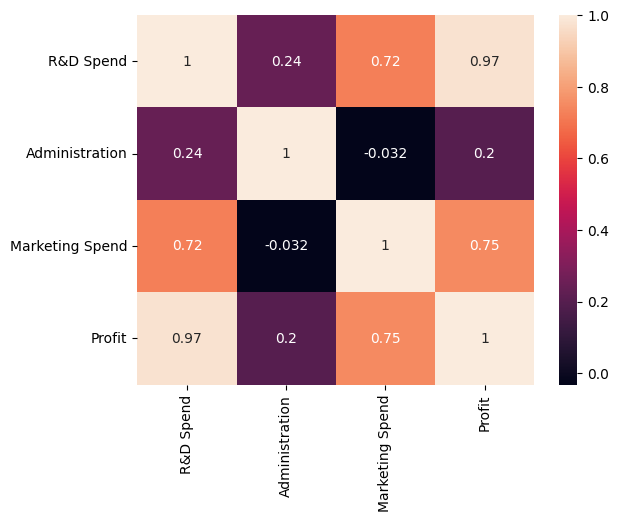

In [ ]:
sns.heatmap(corr, annot=True)
plt.show()

Research and Development spend is highly correlated with profit and marketing spend.
A higher marketing spend results in a higher profit.
A higher R&D spend results in higher profit too.
Administration budget has no strong impact on the rest of the variables

In [ ]:
pd.pivot_table(startups,values=('Profit','Marketing Spend','R&D Spend'),index=['State'], aggfunc=np.average)

,Marketing Spend,Profit,R&D Spend
State,,,
California,182540.929412,103905.175294,64657.674118
Florida,247323.551250,118774.024375,80724.016250
New York,205346.015882,113756.446471,76195.062353


<AxesSubplot: xlabel='State', ylabel='Profit'>

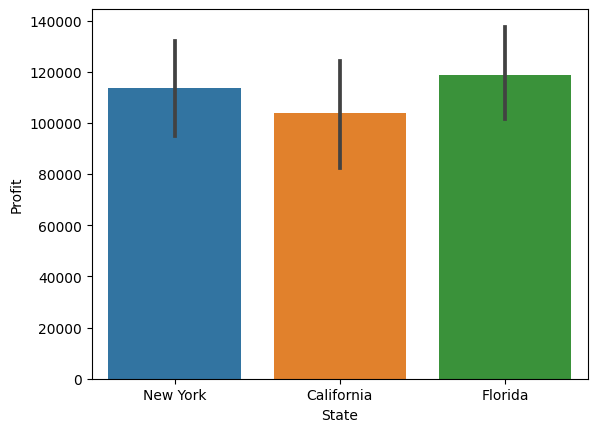

In [ ]:
sns.barplot(x=startups['State'],y=startups['Profit'])

Conclusion and Inferences
It is clear that if a startup uses more funds in marketing and research and development of its product it is guaranteed a higher profit.
Florida has startups which record the highest profits followed by New York then California.

In [ ]:
#second dataset
data=pd.read_csv("C:/Users/Ms. Parmuat/Documents/Datasets/simple datasets/Data.csv")
data.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [ ]:
data.shape

(10, 4)

In [ ]:
data.describe()

,Age,Salary
count,9.000000,9.000000
mean,38.777778,63777.777778
std,7.693793,12265.579662
min,27.000000,48000.000000
25%,35.000000,54000.000000
50%,38.000000,61000.000000
75%,44.000000,72000.000000
max,50.000000,83000.000000


In [ ]:
data.isnull().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

In [ ]:
data[data['Salary'].isnull()]

,Country,Age,Salary,Purchased
4,Germany,40.0,NaN,Yes


checked null values and subset the rows with null values to check for any similarity, there is none.
I decided to impute the missing values given the dataset is too small and deletion mightr injure the inferences made. filled salary column with the mean salary and age column with the modal age.

In [ ]:
mean=data.Salary.mean()
data['Salary'].fillna(mean,inplace=True)

In [ ]:
mode=data.Age.mode()
data['Age'].fillna(mode,inplace=True)

In [ ]:
data.isnull().sum()

Country      0
Age          0
Salary       0
Purchased    0
dtype: int64

C:\Users\Ms. Parmuat\AppData\Local\Temp\ipykernel_6396\949896845.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data['Age'],bins=10)


<AxesSubplot: ylabel='Density'>

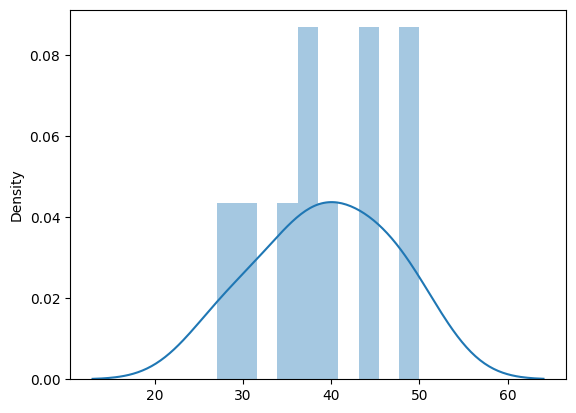

In [ ]:
sns.distplot(x=data['Age'],bins=10)

Age is normally distributed. Salary is also normally distributed.

C:\Users\Ms. Parmuat\AppData\Local\Temp\ipykernel_6396\2128826405.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=data.corr()


<AxesSubplot: >

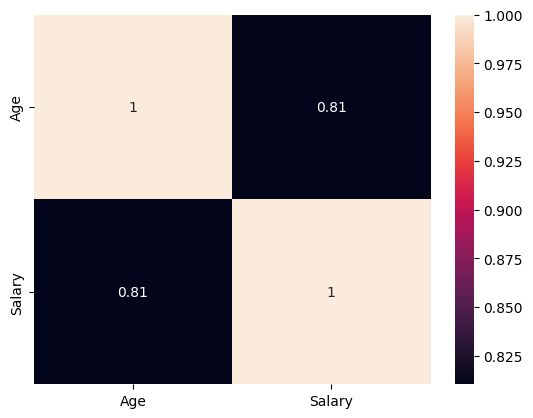

In [ ]:
correlation=data.corr()
sns.heatmap(correlation,annot=True)

Age and salary are highly correlated.

In [ ]:
data.groupby('Country').mean()['Salary']

C:\Users\Ms. Parmuat\AppData\Local\Temp\ipykernel_6396\1028744618.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('Country').mean()['Salary']


Country
France     69000.000000
Germany    66925.925926
Spain      53666.666667
Name: Salary, dtype: float64

<AxesSubplot: xlabel='Purchased', ylabel='Count'>

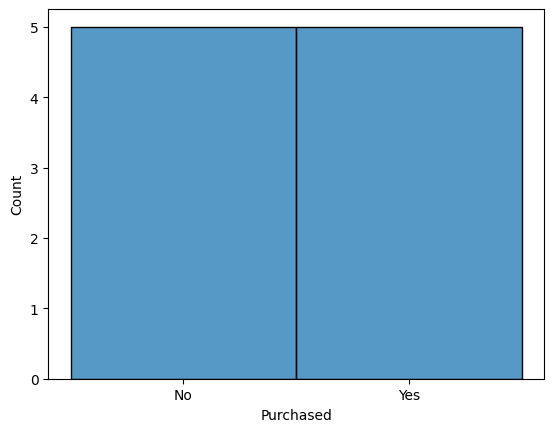

In [ ]:
sns.histplot(data['Purchased'])

In [ ]:
x= data.Purchased.value_counts()
x

No     5
Yes    5
Name: Purchased, dtype: int64

In [ ]:
data[['Country','Purchased']]

,Country,Purchased
0,France,No
1,Spain,Yes
2,Germany,No
3,Spain,No
4,Germany,Yes
5,France,Yes
6,Spain,No
7,France,Yes
8,Germany,No
9,France,Yes
